<a href="https://colab.research.google.com/github/CarolinaOliveira001/Complex_Network/blob/main/Assignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This library has to be installed before starting solving any exercise.

In [ ]:
!pip install ndlib

Since I am using google colab, this is how I downloaded the data.

In [5]:
from google.colab import files
uploaded = files.upload()

Saving 414.edges to 414.edges


Here are all of the imports needed for this assignment.

In [17]:
from IPython.display import Image, display
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.opinions as op
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
import ndlib.models.epidemics as ep
from ndlib.viz.mpl.OpinionEvolution import OpinionEvolution
from random import sample

We use this algorithm to create the Facebook-Ego.

In [6]:
filenameFacebook = "414.edges"

graphFacebook = nx.Graph()

with open(filenameFacebook) as f:
    for line in f:
        x = line.split()
        a = int(x[0])
        b = int(x[1])
        
        if a not in list(graphFacebook.nodes):
            graphFacebook.add_node(a)
        if b not in list(graphFacebook.nodes):
            graphFacebook.add_node(b)

        graphFacebook.add_edge(a, b)

#Question (a)

Using the Sznajd model, we want to simulate the cascade of misinformation with different initial "infected" numbers.

So first, we create a set with the k random picked nodes. This k will be either 5 or 15 or 30. Then this nodes will be the initial "infected" nodes. Then we configurate the model with the corresponding number of "infected" nodes, we iterate the model 100 times and build trends.

At the end, we will take a look at 2 plots: Prevelance and Trend of the model after the 100 iterations.

##Initial value of "infected" people = 5

In [52]:
random_nodes5 = set(sample(list(graphFacebook.nodes()), 5))

In [53]:
model5 = op.SznajdModel(graphFacebook)
config5 = mc.Configuration()
config5.add_model_parameter('infected', random_nodes5)
model5.set_initial_status(config5)

iterations5 = model5.iteration_bunch(100)
trends5 = model5.build_trends(iterations5)

/usr/local/lib/python3.7/dist-packages/ndlib/models/DiffusionModel.py:120: UserWarning: Initial infection missing: a random sample of 5% of graph nodes will be set as infected
  warnings.warn('Initial infection missing: a random sample of 5% of graph nodes will be set as infected')


We will take a look at 2 plots: Prevelance and Trend of the model after 100 iterations.

In [54]:
vizDP5 = DiffusionPrevalence(model5, trends5)
vizDP5.plot("prevalence5.png")
vizDT5 = DiffusionTrend(model5, trends5)
vizDT5.plot("diffusion5.png")

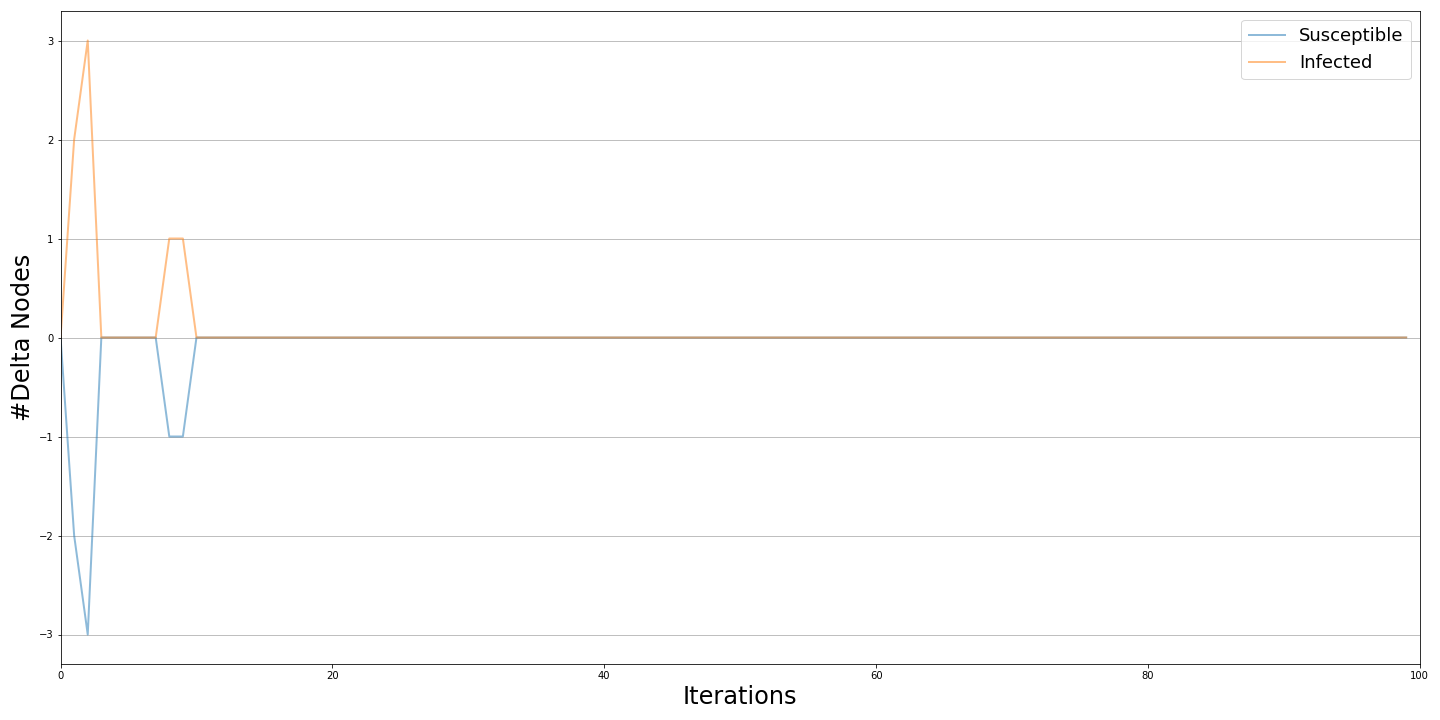

In [55]:
display(Image("prevalence5.png"))

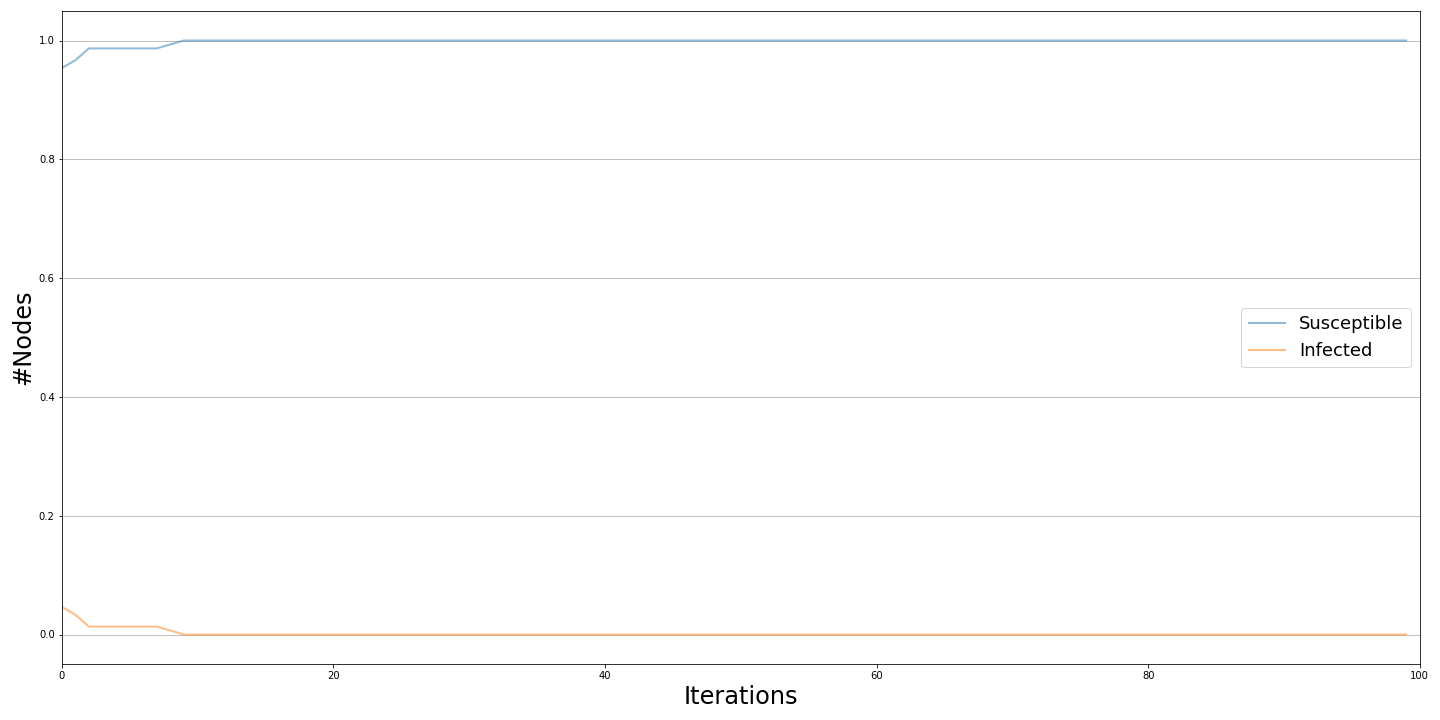

In [56]:
display(Image("diffusion5.png"))

##Initial value of "infected" people = 15


In [57]:
random_nodes15 = set(sample(list(graphFacebook.nodes()), 15))

In [58]:
model15 = op.SznajdModel(graphFacebook)
config15 = mc.Configuration()
config15.add_model_parameter('infected', random_nodes15)

model15.set_initial_status(config15)
iterations15 = model15.iteration_bunch(100)
trends15 = model15.build_trends(iterations15)

/usr/local/lib/python3.7/dist-packages/ndlib/models/DiffusionModel.py:120: UserWarning: Initial infection missing: a random sample of 5% of graph nodes will be set as infected
  warnings.warn('Initial infection missing: a random sample of 5% of graph nodes will be set as infected')


In [59]:
vizDP15 = DiffusionPrevalence(model15, trends15)
vizDP15.plot("prevalence15.png")
vizDT15 = DiffusionTrend(model15, trends15)
vizDT15.plot("diffusion15.png")

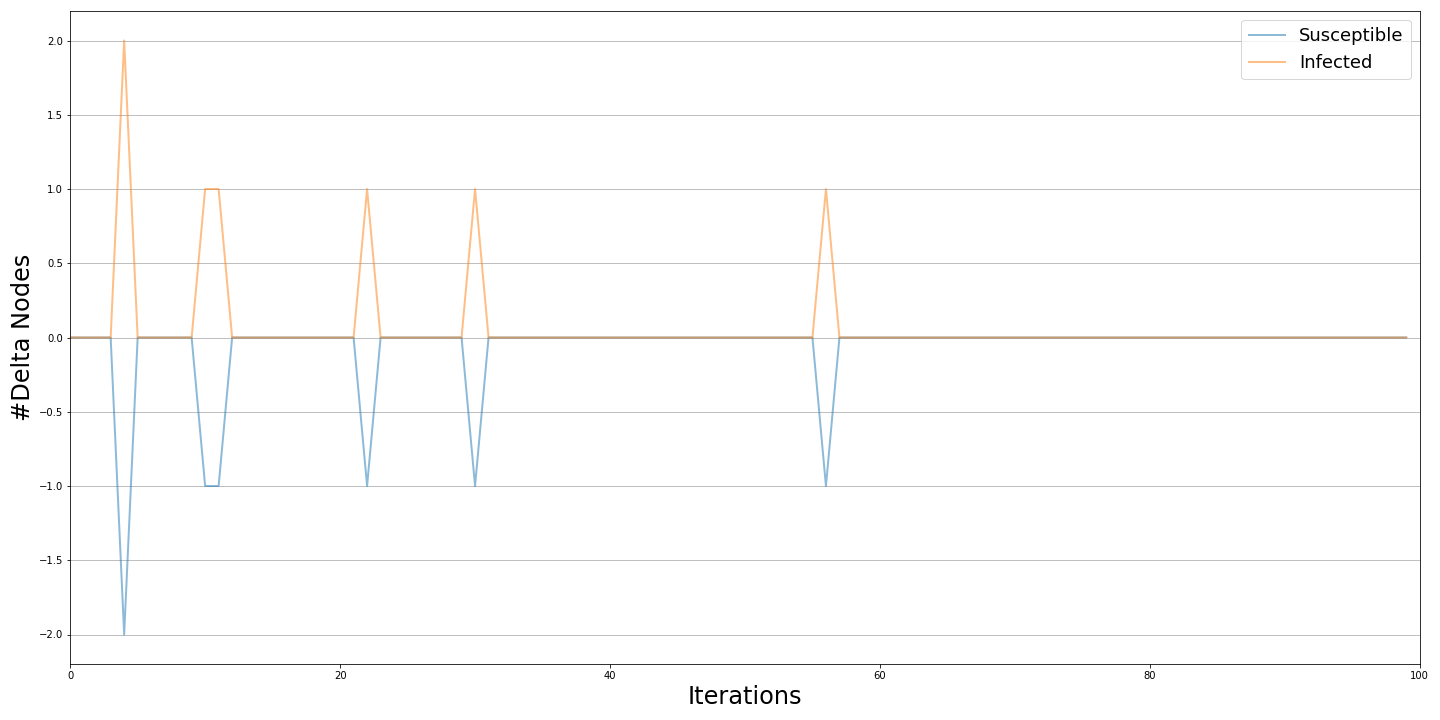

In [60]:
display(Image("prevalence15.png"))

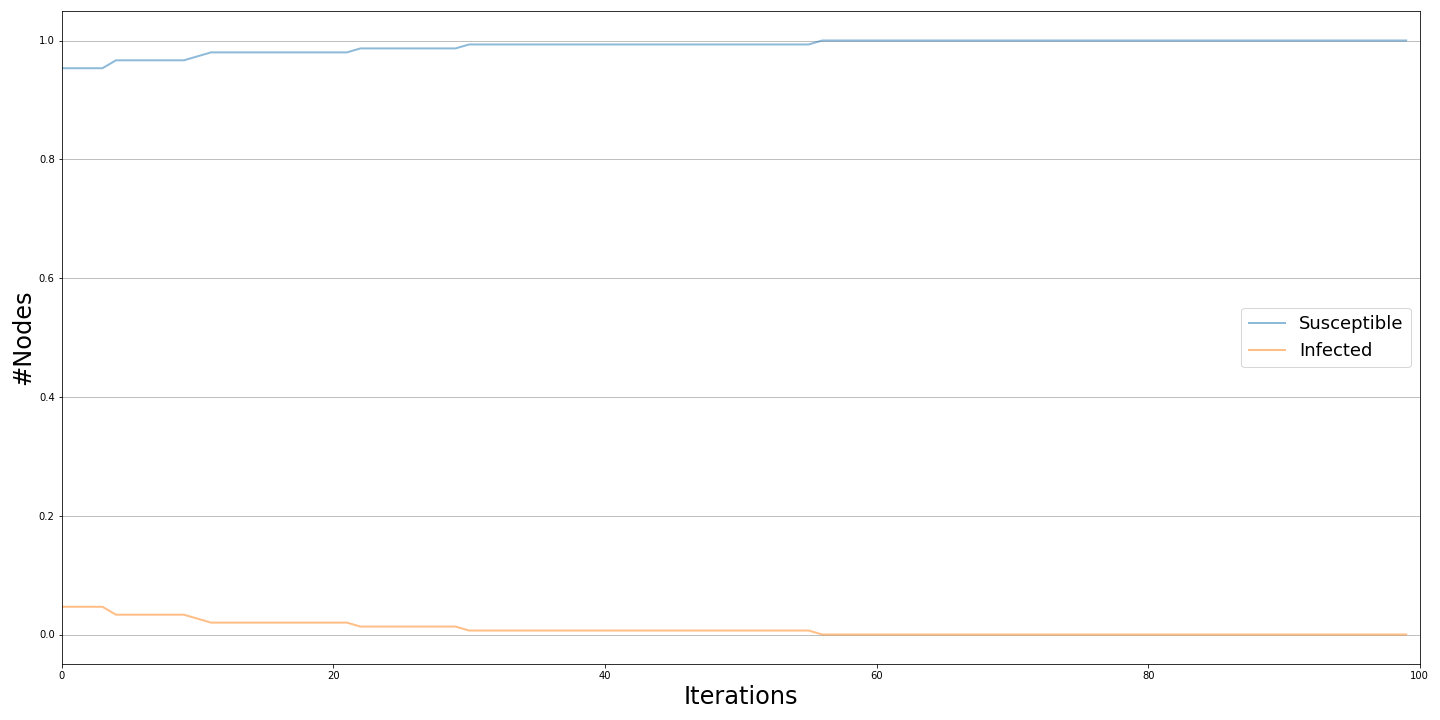

In [61]:
display(Image("diffusion15.png"))

##Initial value of "infected" people = 30

In [47]:
random_nodes30 = set(sample(list(graphFacebook.nodes()), 30))

In [48]:
model30 = op.SznajdModel(graphFacebook)
config30 = mc.Configuration()
config30.add_model_parameter('infected', random_nodes30)

model30.set_initial_status(config30)
iterations30 = model30.iteration_bunch(100)
trends30 = model30.build_trends(iterations30)

/usr/local/lib/python3.7/dist-packages/ndlib/models/DiffusionModel.py:120: UserWarning: Initial infection missing: a random sample of 5% of graph nodes will be set as infected
  warnings.warn('Initial infection missing: a random sample of 5% of graph nodes will be set as infected')


In [49]:
vizDP30 = DiffusionPrevalence(model30, trends30)
vizDP30.plot("prevalence30.png")
vizDT30 = DiffusionTrend(model30, trends30)
vizDT30.plot("diffusion30.png")

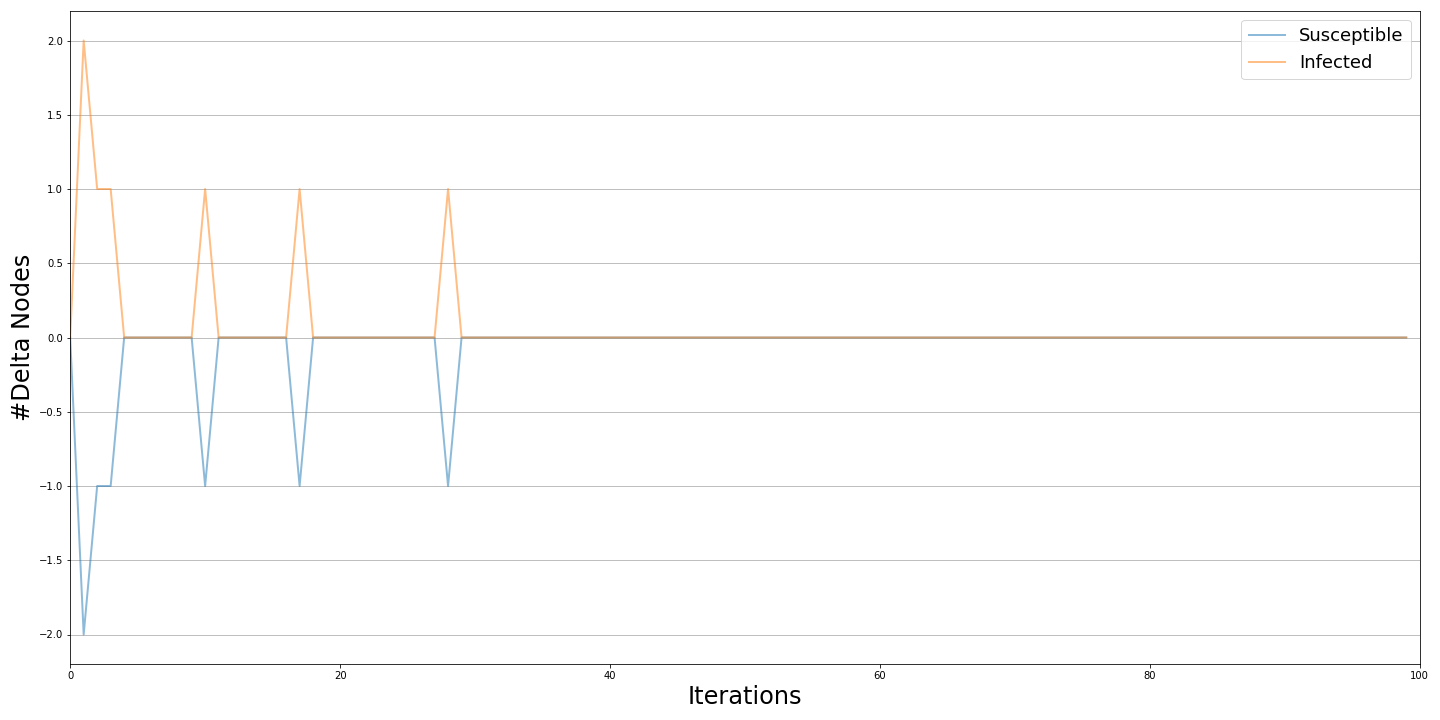

In [50]:
display(Image("prevalence30.png"))

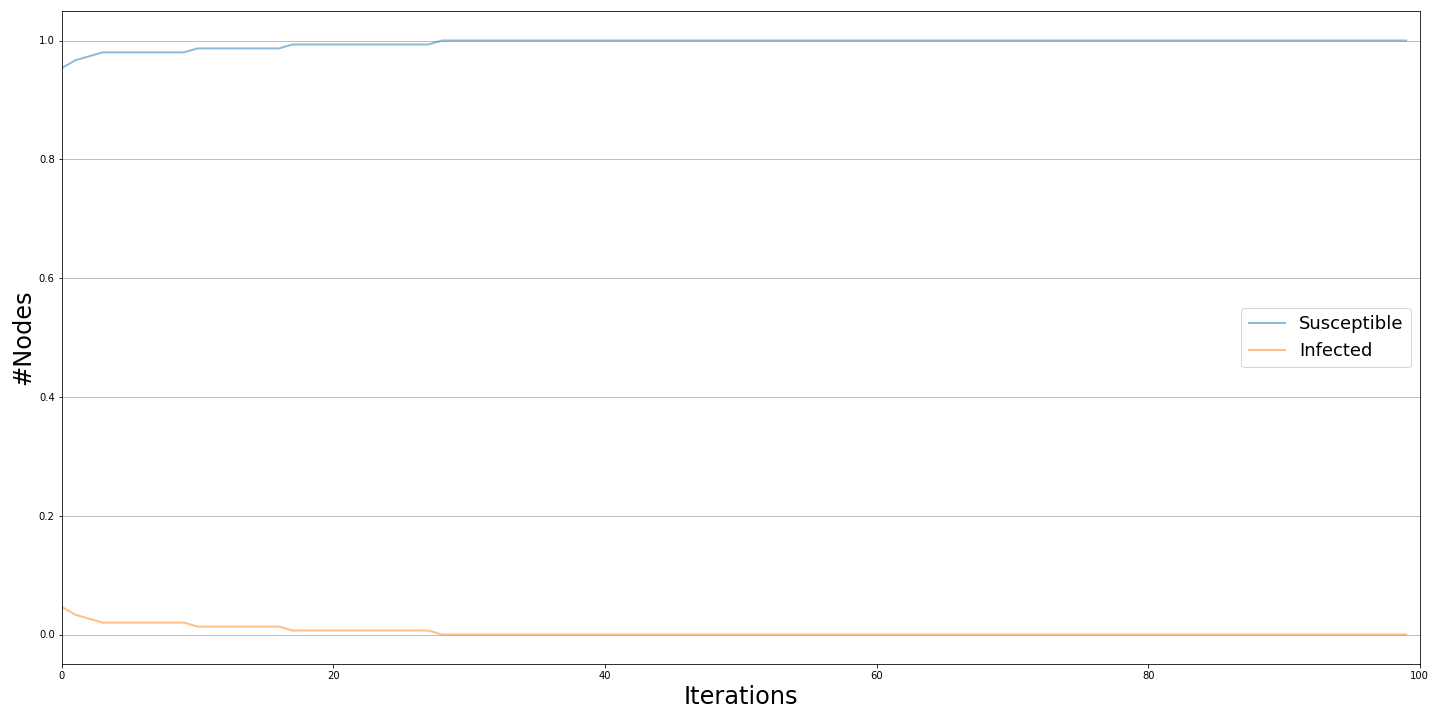

In [51]:
display(Image("diffusion30.png"))

##Conclusion

First note that the Susceptible line is a mirror of the Infected line.

Just looking at the Trend plot we can see that for the given initial number of "infected" nodes, the higher this number is, the more iterations we need so the "disease" dies down. However this depends a lot of the initial nodes picked at random. If we are unlucky, the latter set will contain nodes with high number of connections that will make the "disease" to die much slower.

#Question (b)

Using the SIR model, we want to simulate the epidemics cascade with different initial infection and removal probability.

We will use the library from Ndlib to find this model. The infection rate is beta and the removal rate is gamma. We will try 3 SIR model with different values for beta and gamma. Then we configurate the model with the corresponding value of beta and gamma, we iterate the model 100 times and build trends.

At the end, we will take a look at 2 plots: Prevelance and Trend of the model after the 100 iterations.

#infection rate = 0.5 & recovery rate = 0.2

In [62]:
modelSIR1 = ep.SIRModel(graphFacebook)
cfgSIR1 = mc.Configuration()
cfgSIR1.add_model_parameter('beta', 0.5)
cfgSIR1.add_model_parameter('gamma', 0.2)
modelSIR1.set_initial_status(cfgSIR1)

iterationsSIR1 = modelSIR1.iteration_bunch(100)
trendsSIR1 = modelSIR1.build_trends(iterationsSIR1)

/usr/local/lib/python3.7/dist-packages/ndlib/models/DiffusionModel.py:120: UserWarning: Initial infection missing: a random sample of 5% of graph nodes will be set as infected
  warnings.warn('Initial infection missing: a random sample of 5% of graph nodes will be set as infected')


In [63]:
vizDPSIR1 = DiffusionPrevalence(modelSIR1, trendsSIR1)
vizDPSIR1.plot("prevalenceSIR1.png")
vizDTSIR1 = DiffusionTrend(modelSIR1, trendsSIR1)
vizDTSIR1.plot("diffusionSIR1.png")

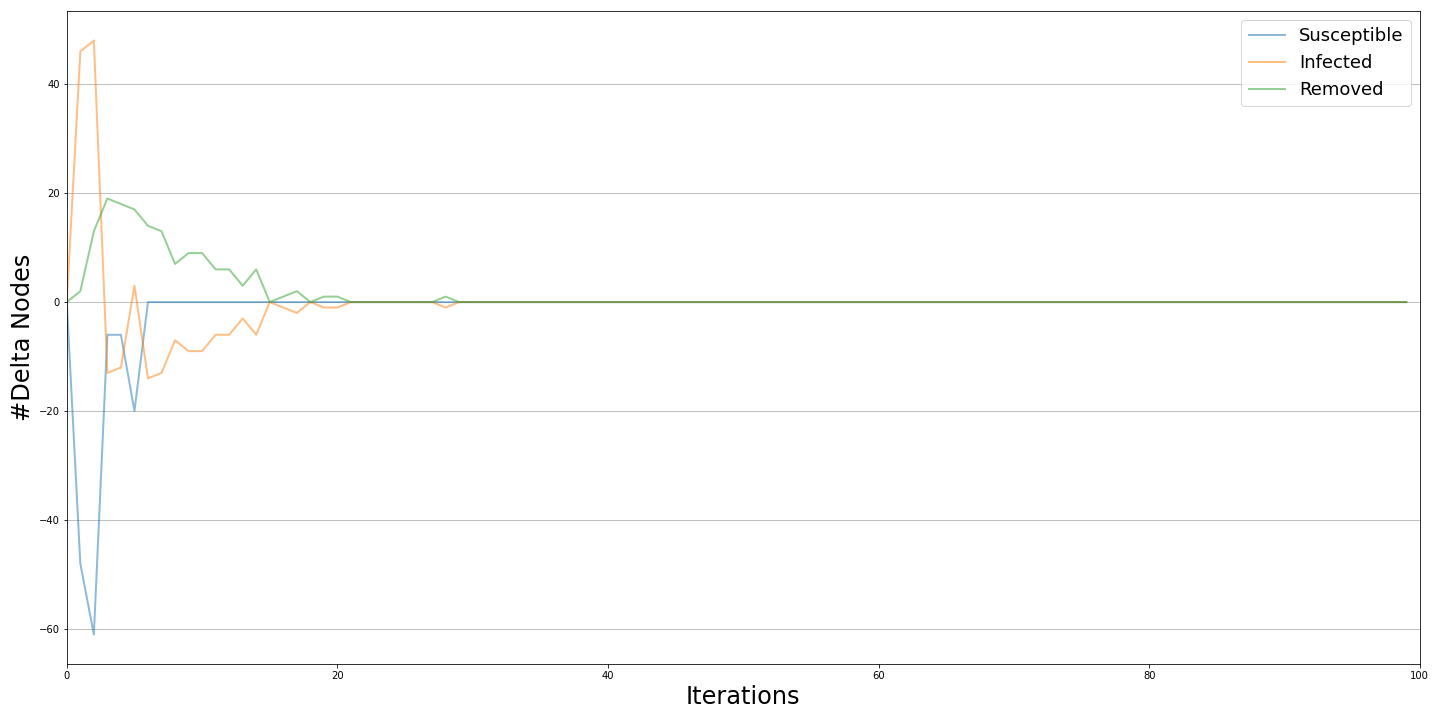

In [64]:
display(Image("prevalenceSIR1.png"))

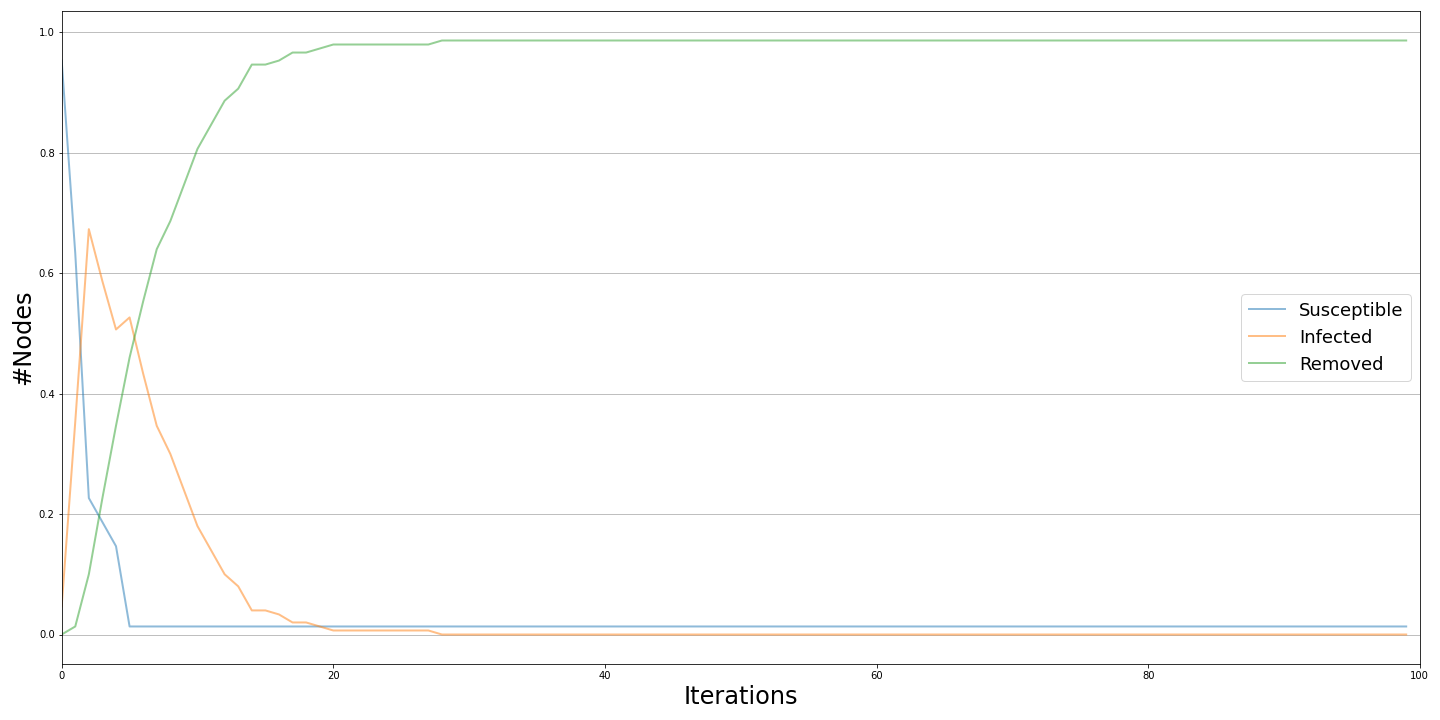

In [65]:
display(Image("diffusionSIR1.png"))

#infection rate = 0.3 & recovery rate = 0.3

In [67]:
modelSIR2 = ep.SIRModel(graphFacebook)
cfgSIR2 = mc.Configuration()
cfgSIR2.add_model_parameter('beta', 0.3)
cfgSIR2.add_model_parameter('gamma', 0.3)
modelSIR2.set_initial_status(cfgSIR2)

iterationsSIR2 = modelSIR2.iteration_bunch(100)
trendsSIR2 = modelSIR2.build_trends(iterationsSIR2)

In [69]:
vizDPSIR2 = DiffusionPrevalence(modelSIR2, trendsSIR2)
vizDPSIR2.plot("prevalenceSIR2.png")
vizDTSIR2 = DiffusionTrend(modelSIR2, trendsSIR2)
vizDTSIR2.plot("diffusionSIR2.png")

/usr/local/lib/python3.7/dist-packages/ndlib/viz/mpl/DiffusionViz.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20, 10))
/usr/local/lib/python3.7/dist-packages/ndlib/viz/mpl/DiffusionViz.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20, 10))


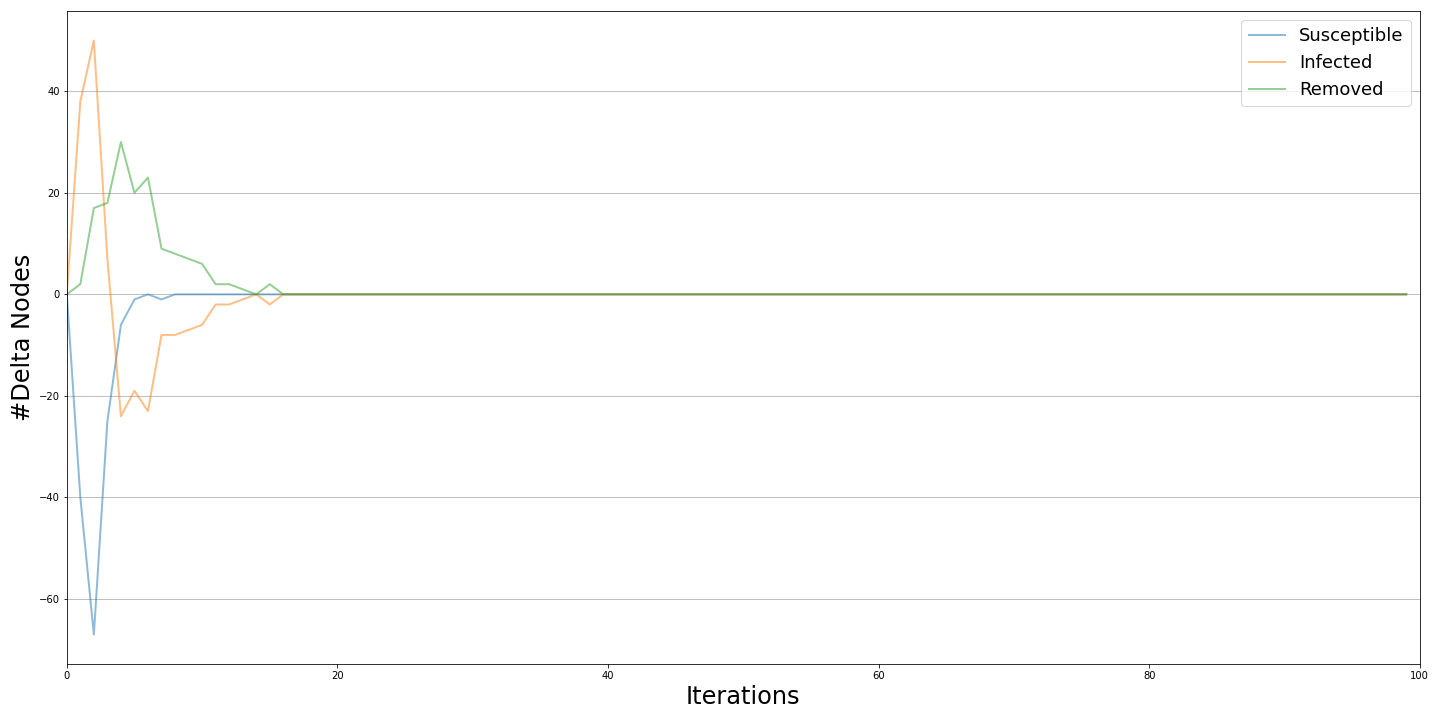

In [70]:
display(Image("prevalenceSIR2.png"))

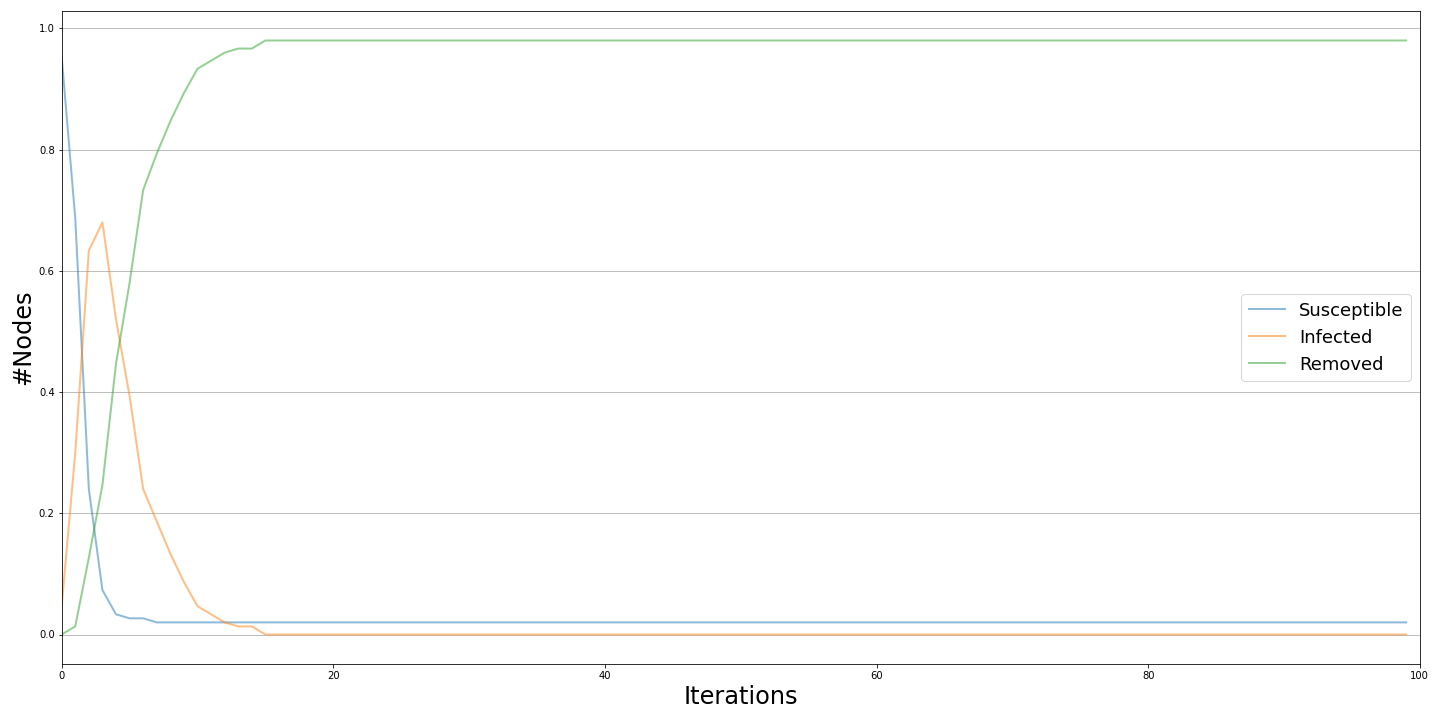

In [71]:
display(Image("diffusionSIR2.png"))

#infection rate = 0.4 & recovery rate = 0.5

In [73]:
modelSIR3 = ep.SIRModel(graphFacebook)
cfgSIR3 = mc.Configuration()
cfgSIR3.add_model_parameter('beta', 0.4)
cfgSIR3.add_model_parameter('gamma', 0.5)
modelSIR3.set_initial_status(cfgSIR3)

iterationsSIR3 = modelSIR3.iteration_bunch(100)
trendsSIR3 = modelSIR3.build_trends(iterationsSIR3)

/usr/local/lib/python3.7/dist-packages/ndlib/models/DiffusionModel.py:120: UserWarning: Initial infection missing: a random sample of 5% of graph nodes will be set as infected
  warnings.warn('Initial infection missing: a random sample of 5% of graph nodes will be set as infected')


In [74]:
vizDPSIR3 = DiffusionPrevalence(modelSIR3, trendsSIR3)
vizDPSIR3.plot("prevalenceSIR3.png")
vizDTSIR3 = DiffusionTrend(modelSIR3, trendsSIR3)
vizDTSIR3.plot("diffusionSIR3.png")
vizSIR3 = OpinionEvolution(modelSIR3, iterationsSIR3)
vizSIR3.plot("opinionSIR3.png")

/usr/local/lib/python3.7/dist-packages/ndlib/viz/mpl/DiffusionViz.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20, 10))
/usr/local/lib/python3.7/dist-packages/ndlib/viz/mpl/DiffusionViz.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20, 10))


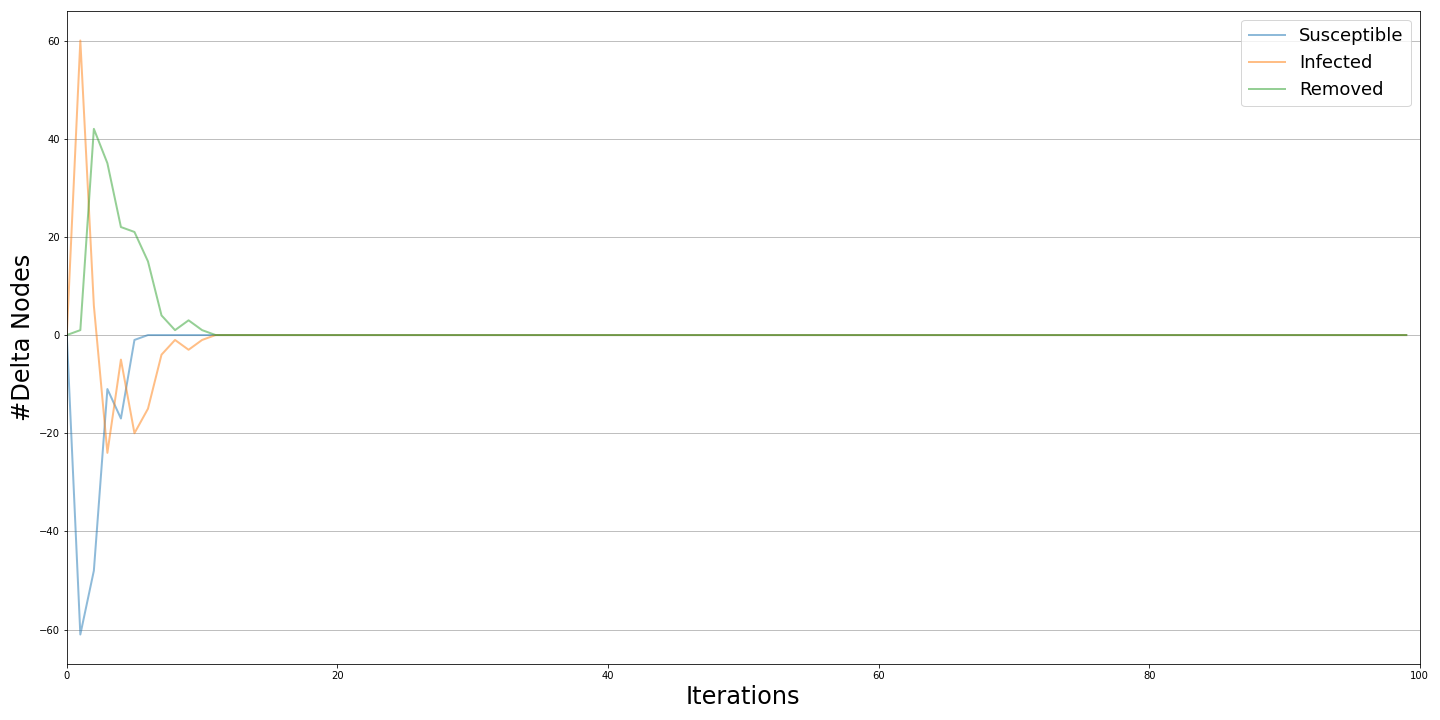

In [75]:
display(Image("prevalenceSIR3.png"))

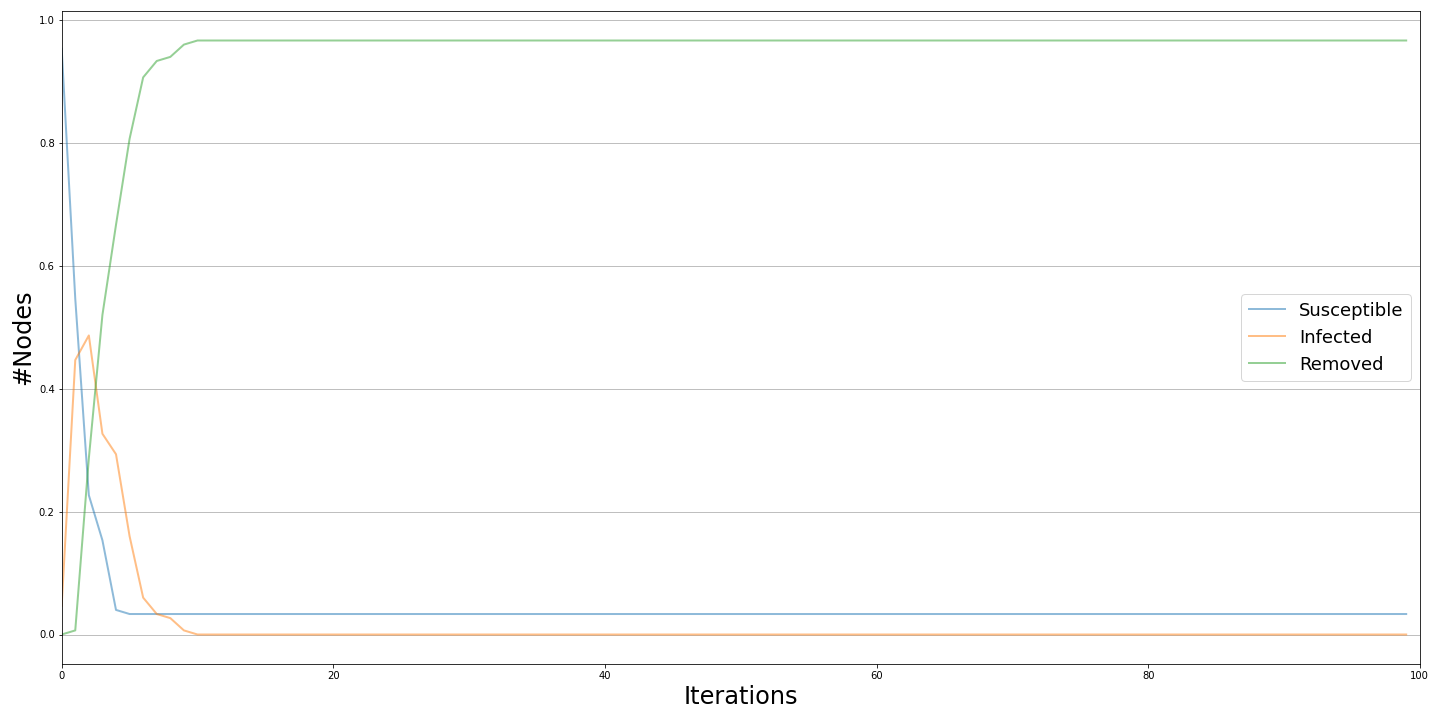

In [76]:
display(Image("diffusionSIR3.png"))

##Conclusion